# Machine Learning 
## classification Algorithm
## Logistic REgression 
## KNN 
## Decision Tree
## Naive Bayes 
## Evalution Matrics 
### Accuracy  precision REcall F1- score COns

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df=sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.shape

(891, 15)

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.drop(['adult_male','alive','embark_town'],axis=1,inplace=True)

In [7]:

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,NaN,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,C,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,NaN,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,C,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,NaN,True


In [8]:
df.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
deck        688
alone         0
dtype: int64

In [9]:
df['age'].fillna(df['age'].mean(),inplace=True)

C:\Users\V I C T U S\AppData\Local\Temp\ipykernel_24748\1492264711.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(),inplace=True)


In [10]:
df['age'].isna().sum()

np.int64(0)

In [11]:
df.drop('deck',axis=1,inplace=True)

<Axes: >

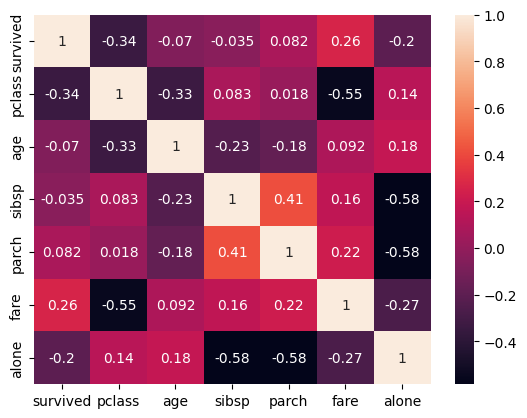

In [12]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [14]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True


In [15]:
cols=['sex','class','embarked']
df[cols]=le.fit_transform(cols)

In [16]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,alone
0,0,3,2,22.0,1,0,7.2500,1,0,man,False
1,1,1,2,38.0,1,0,71.2833,1,0,woman,False
2,1,3,2,26.0,0,0,7.9250,1,0,woman,True
3,1,1,2,35.0,1,0,53.1000,1,0,woman,False
4,0,3,2,35.0,0,0,8.0500,1,0,man,True


In [17]:
df.drop('who',inplace=True,axis=1)

In [18]:
df=df.astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   survived  891 non-null    int64
 1   pclass    891 non-null    int64
 2   sex       891 non-null    int64
 3   age       891 non-null    int64
 4   sibsp     891 non-null    int64
 5   parch     891 non-null    int64
 6   fare      891 non-null    int64
 7   embarked  891 non-null    int64
 8   class     891 non-null    int64
 9   alone     891 non-null    int64
dtypes: int64(10)
memory usage: 69.7 KB


In [20]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone
0,0,3,2,22,1,0,7,1,0,0
1,1,1,2,38,1,0,71,1,0,0
2,1,3,2,26,0,0,7,1,0,1
3,1,1,2,35,1,0,53,1,0,0
4,0,3,2,35,0,0,8,1,0,1


In [21]:
x=df.drop('survived',axis=1)

In [22]:
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,alone
0,3,2,22,1,0,7,1,0,0
1,1,2,38,1,0,71,1,0,0
2,3,2,26,0,0,7,1,0,1
3,1,2,35,1,0,53,1,0,0
4,3,2,35,0,0,8,1,0,1


In [23]:
y=df['survived']

In [24]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [27]:
y_test.head()

709    1
439    0
840    0
720    1
39     1
Name: survived, dtype: int64

In [28]:
y_train.head()

445    1
650    0
172    1
450    0
314    0
Name: survived, dtype: int64

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [30]:
model = LogisticRegression(random_state=42,max_iter=1000)

In [31]:
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [32]:
y_predit= model.predict(x_test)

In [33]:
y_predit

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1])

In [34]:
accuracy_score(y_predit,y_test)

0.7574626865671642

In [35]:
confusion_matrix(y_test,y_predit)

array([[141,  16],
       [ 49,  62]])

In [36]:
print(f"the report is {classification_report(y_test,y_predit)}")

the report is               precision    recall  f1-score   support

           0       0.74      0.90      0.81       157
           1       0.79      0.56      0.66       111

    accuracy                           0.76       268
   macro avg       0.77      0.73      0.73       268
weighted avg       0.76      0.76      0.75       268



In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn=KNeighborsClassifier(n_neighbors=3)

In [39]:
knn.fit(x_train,y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [43]:
accuracy_score(y_test,y_pred)

0.6977611940298507

In [46]:
print(f'the result is {classification_report(y_test,y_pred)}')

the result is               precision    recall  f1-score   support

           0       0.71      0.83      0.76       157
           1       0.68      0.51      0.58       111

    accuracy                           0.70       268
   macro avg       0.69      0.67      0.67       268
weighted avg       0.69      0.70      0.69       268



In [47]:
x_test

,pclass,sex,age,sibsp,parch,fare,embarked,class,alone
709,3,2,29,1,1,15,1,0,0
439,2,2,31,0,0,10,1,0,1
840,3,2,20,0,0,7,1,0,1
720,2,2,6,0,1,33,1,0,0
39,3,2,14,1,0,11,1,0,0
...,...,...,...,...,...,...,...,...,...
821,3,2,27,0,0,8,1,0,1
633,1,2,29,0,0,0,1,0,1
456,1,2,65,0,0,26,1,0,1
500,3,2,17,0,0,8,1,0,1


In [48]:
from sklearn.naive_bayes import GaussianNB

In [49]:
model_nb= GaussianNB()

In [51]:
model_nb.fit(x_test,y_test)

,priors,None
,var_smoothing,1e-09


In [52]:
predict= model_nb.predict(x_test)

In [53]:
accuracy_score(y_test,predict)

0.7313432835820896

In [54]:
confusion_matrix(y_test,predict)

array([[132,  25],
       [ 47,  64]])

In [57]:
print(f'{classification_report(y_test,predict)}')

              precision    recall  f1-score   support

           0       0.74      0.84      0.79       157
           1       0.72      0.58      0.64       111

    accuracy                           0.73       268
   macro avg       0.73      0.71      0.71       268
weighted avg       0.73      0.73      0.73       268



In [58]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [60]:
clf.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [61]:
dt=clf.predict(x_test)

In [62]:
accuracy_score(y_test,dt)

0.6604477611940298

In [63]:
x_test

,pclass,sex,age,sibsp,parch,fare,embarked,class,alone
709,3,2,29,1,1,15,1,0,0
439,2,2,31,0,0,10,1,0,1
840,3,2,20,0,0,7,1,0,1
720,2,2,6,0,1,33,1,0,0
39,3,2,14,1,0,11,1,0,0
...,...,...,...,...,...,...,...,...,...
821,3,2,27,0,0,8,1,0,1
633,1,2,29,0,0,0,1,0,1
456,1,2,65,0,0,26,1,0,1
500,3,2,17,0,0,8,1,0,1


In [64]:
cols=['pclass','sex','age','fare']
from sklearn.preprocessing import StandardScaler
se=StandardScaler()

In [66]:
df[cols]=se.fit_transform(df[cols])

In [67]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone
0,0,0.827377,0.0,-0.580044,1,0,-0.498948,1,0,0
1,1,-1.566107,0.0,0.650112,1,0,0.789405,1,0,0
2,1,0.827377,0.0,-0.272505,0,0,-0.498948,1,0,1
3,1,-1.566107,0.0,0.419458,1,0,0.427056,1,0,0
4,0,0.827377,0.0,0.419458,0,0,-0.478817,1,0,1
